## Analysis on Heart Attack Report

### Introduction

According to the NY Department of Health, [1 in every 5 people die from heart disease](https://www.health.ny.gov/diseases/cardiovascular/heart_disease/#:~:text=About%20695%2C000%20people%20die%20of,killing%20approximately%20375%2C476%20people%20annually). Heart disease is a major concern to billions of people worldwide, But its casualties and consequences can be mitigated much more effectively when discovered early. This is why it'll be beneficial to be able to predict the status of heart disease in an individual using related factors. 
We will use the [provided dataset](https://archive.ics.uci.edu/dataset/45/heart+disease) involving 76 attributes of medical test data from Hungary, Switzerland, VA Long Beach, and Cleveland, using the latter in which we will obtain the data and investigate from. We decided to use the Cleveland database as it contains the largest amount of observations and 14 relevant attributes. We aim to use classification modelling with this data to study its relationship with heart disease using a few distinct variables. We can generalize our objective with a single question: 
Is it possible to predict an individual's chances of developing heart disease using only their prior medical test data?


### Preliminary Exploratory Data Analysis

Importing the libraries needed for the project.

In [48]:
# install and import packages
#install.packages(c("languageserver", "repr", "tidymodels", "RColorBrewer"))
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

Downloading and reading the <a href="https://archive.ics.uci.edu/dataset/45/heart+disease">data</a>.

In [49]:
set.seed(1111)

url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
dest <- "data/file.zip"

# checks if the data file exists
if (!dir.exists("data/")) {
  #creates the file if it doesn't exist
  dir.create("data/", recursive = TRUE)
}

# downloads the file from the url to data file
download.file(url, dest)

# unzips the file
unzip(zipfile = dest,
      files = "processed.cleveland.data",
      exdir = "data/")

# added column names to the data
cleveland_data_col_names <- c("age",
                              "sex",
                              "cp",
                              "trestbps",
                              "chol", "fbs",
                              "restecg", "thalach",
                              "exang",
                              "oldpeak",
                              "slope",
                              "ca",
                              "thal",
                              "num")

# reading the data by csv
cleveland_data <- read_csv("data/processed.cleveland.data",
                           col_names = cleveland_data_col_names)

head(cleveland_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


### Describing The Data

**Available features in the dataset.**

In [50]:
set.seed(1111)

# taking a look at the features in the dataset
print(cleveland_data_col_names)

 [1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "num"     


**What type of data is in the dataset.**

In [51]:
set.seed(1111)

# taking a look at the data patterns
glimpse(cleveland_data)

Rows: 303
Columns: 14
$ age      <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 5…
$ sex      <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1…
$ cp       <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1…
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2…
$ thalach  <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 1…
$ exang    <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0…
$ slope    <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2…
$ ca       <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0", "1.0"…
$ thal     <chr> "

**Unique values in each column.**

We found that the columns: `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `num` should be represented as categorical variables.

In [52]:
set.seed(1111)

# Get all the unique values per column
cleveland_unique <- lapply(cleveland_data, unique)

# counts the number of different uniques per column
unique_counts <- sapply(cleveland_unique, length)

# only keep the columns where theres less than 10 uniques
cleveland_unique <- cleveland_unique[unique_counts < 10]

print(cleveland_unique)

$sex
[1] 1 0

$cp
[1] 1 4 3 2

$fbs
[1] 1 0

$restecg
[1] 2 0 1

$exang
[1] 0 1

$slope
[1] 3 2 1

$ca
[1] "0.0" "3.0" "2.0" "1.0" "?"  

$thal
[1] "6.0" "3.0" "7.0" "?"  

$num
[1] 0 2 1 3 4



### Data Transformation

**Transforming `ca` and `thal` columns into dbl type.**

In [53]:
set.seed(1111)

cleveland_data <- cleveland_data |>
  mutate(ca = as.numeric(ca),
         thal = as.numeric(thal))
head(cleveland_data)

Warning message:
"There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning."


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


**Checking for rows containing NA or "?".**

- We found below that the column `ca` and `thal` contains nulls.

In [54]:
set.seed(1111)

# making a tibble with column type and the number of nulls in each column
cleveland_summary <- tibble(
  ColumnName = cleveland_data_col_names,
  NumNulls = map_dbl(cleveland_data, ~sum(.x == "?", na.rm = TRUE)),
  NumNAs = map_dbl(cleveland_data, ~sum(is.na(.x))),
  TotalMissing = map_dbl(cleveland_data,
                         ~sum(.x == "?", na.rm = TRUE) + sum(is.na(.x))),
  ColumnType = map_chr(cleveland_data, ~class(.x))
)
print(cleveland_summary)

# A tibble: 14 × 5
   ColumnName NumNulls NumNAs TotalMissing ColumnType
   <chr>         <dbl>  <dbl>        <dbl> <chr>     
 1 age               0      0            0 numeric   
 2 sex               0      0            0 numeric   
 3 cp                0      0            0 numeric   
 4 trestbps          0      0            0 numeric   
 5 chol              0      0            0 numeric   
 6 fbs               0      0            0 numeric   
 7 restecg           0      0            0 numeric   
 8 thalach           0      0            0 numeric   
 9 exang             0      0            0 numeric   
10 oldpeak           0      0            0 numeric   
11 slope             0      0            0 numeric   
12 ca                0      4            4 numeric   
13 thal              0      2            2 numeric   
14 num               0      0            0 numeric   


**Removing rows containing NA or "?".**

In [55]:
set.seed(1111)

cleveland_filtered <- cleveland_data %>%
  filter(!if_any(everything(), is.na))

# making a tibble with column type and the number of nulls
# in each column to make sure Na is removed
cleveland_summary <- tibble(
  ColumnName = cleveland_data_col_names,
  NumNulls = map_dbl(cleveland_filtered, ~sum(.x == "?", na.rm = TRUE)),
  NumNAs = map_dbl(cleveland_filtered, ~sum(is.na(.x))),
  TotalMissing = map_dbl(cleveland_filtered,
                         ~sum(.x == "?", na.rm = TRUE) + sum(is.na(.x))),
  ColumnType = map_chr(cleveland_filtered, ~class(.x))
)
print(cleveland_summary)

# A tibble: 14 × 5
   ColumnName NumNulls NumNAs TotalMissing ColumnType
   <chr>         <dbl>  <dbl>        <dbl> <chr>     
 1 age               0      0            0 numeric   
 2 sex               0      0            0 numeric   
 3 cp                0      0            0 numeric   
 4 trestbps          0      0            0 numeric   
 5 chol              0      0            0 numeric   
 6 fbs               0      0            0 numeric   
 7 restecg           0      0            0 numeric   
 8 thalach           0      0            0 numeric   
 9 exang             0      0            0 numeric   
10 oldpeak           0      0            0 numeric   
11 slope             0      0            0 numeric   
12 ca                0      0            0 numeric   
13 thal              0      0            0 numeric   
14 num               0      0            0 numeric   


**Transforming the `num` column into 0 and 1**
- Since `num` is what we are trying to predict, we want to have it in a categorical format.
- In `num`, any number greater than 0 represents diagnosis of coronary artery disease

In [56]:
set.seed(1111)

# turn num into either 0 or 1
cleveland_filtered <- cleveland_filtered |>
  mutate(num = ifelse(num > 0, 1, 0))

print(unique(cleveland_filtered$num))

[1] 0 1


**Turning `num` into a factor**
- **Positive** for when num > 0
- **Negative** for when num = 0

In [57]:
set.seed(1111)

# using num as a factor and renaming the categories
cleveland_filtered <- cleveland_filtered |>
  mutate(num = as_factor(num)) |>
  mutate(num = fct_recode(num, "Positive" = "1", "Negative" = "0"))

head(cleveland_filtered)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Negative
67,1,4,160,286,0,2,108,1,1.5,2,3,3,Positive
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Positive
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Negative
41,0,2,130,204,0,2,172,0,1.4,1,0,3,Negative
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Negative


#### Splitting Data

**Before we start with the feature selection, we will split the data into train test splits to avoid breaking the golden rule.**

**This ensures that the feature selection is influenced only by the training data.**

In [58]:
set.seed(1111)

# creating the split object
cleveland_split <- initial_split(cleveland_filtered, prop = 0.8, strata = num)

# creating the training split
cleveland_train <- training(cleveland_split)

# creating the testing split
cleveland_test <- testing(cleveland_split)

head(cleveland_train)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Negative
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Negative
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Negative
57,1,4,140,192,0,0,148,0,0.4,2,0,6,Negative
56,0,2,140,294,0,2,153,0,1.3,2,0,3,Negative
44,1,2,120,263,0,0,173,0,0.0,1,0,7,Negative


#### Feature Selection
K-NN is an algorithm that does not work well with many predictors. To choose the predictors used for K-NN, we will graph the variables against the classifier to see the relationship.

**Imbalance Checking.**
- Although there are more cases of negative, this is not considered class imbalance as the overall amount is similar.

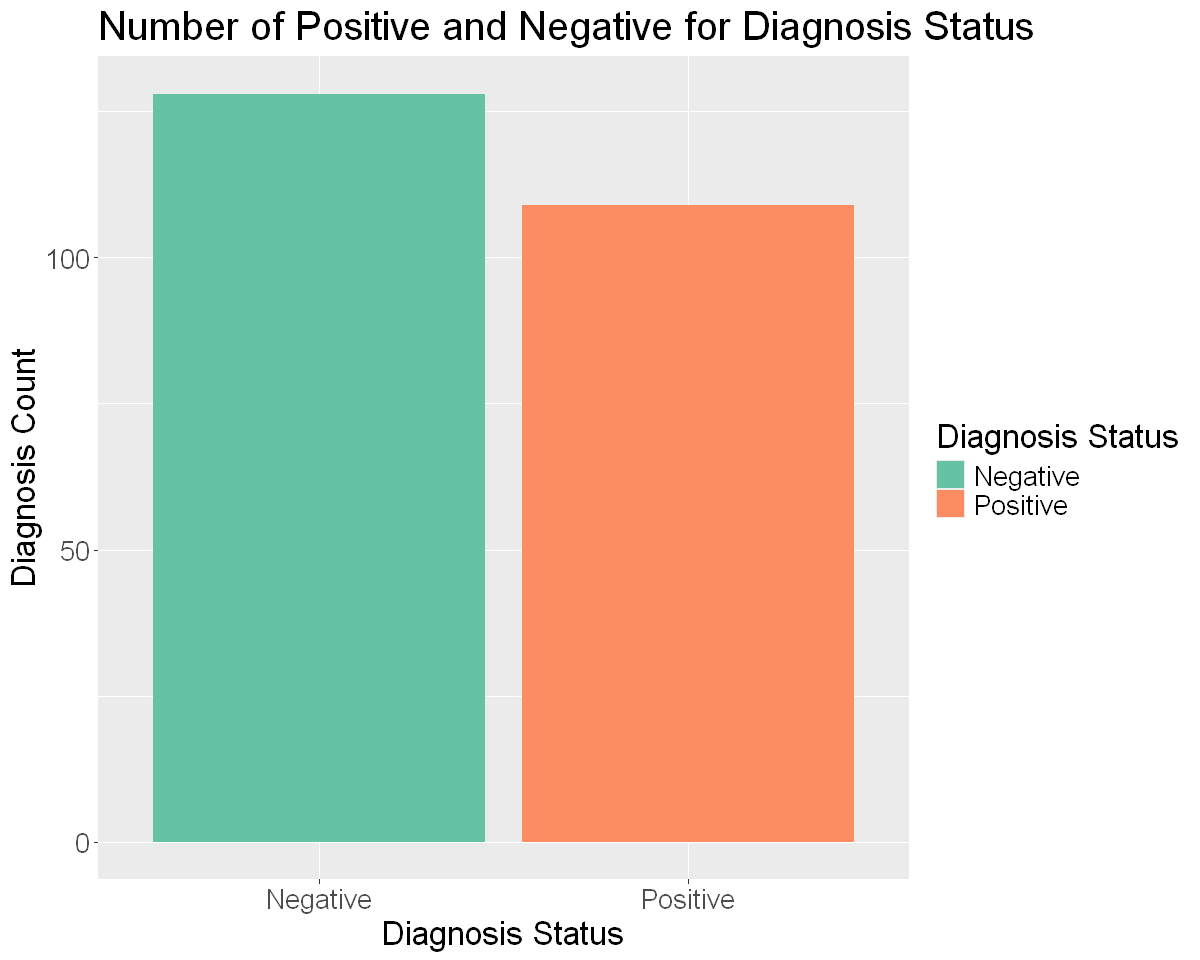

In [59]:
options(repr.plot.width = 10, repr.plot.height = 8)

# number of data points for each diagnosis status
status_dist <- cleveland_train |>
  ggplot(aes(x = num, fill = num)) +
  geom_bar(position = "identity") +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Number of Positive and Negative for Diagnosis Status",
       x = "Diagnosis Status",
       y = "Diagnosis Count",
       fill = "Diagnosis Status") +
  theme(text = element_text(size = 20))

status_dist